Code taken from:
https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/, Jason Brownlee wrote the blog post

In [1]:
import cv2
from cv2 import imread
from cv2 import CascadeClassifier

In [26]:
# load the photograph
# pixels = imread('data/test1.jpg')
# pixels = imread('data/test2.jpg')
pixels = imread('data/selma-to-montgomery-march.jpg')

# load pretrained model
classifier = CascadeClassifier('data/haarcascade_frontalface_default.xml')

# perform face detection
bboxes = classifier.detectMultiScale(pixels, 1.05, 7)

# print bounding box for detected faces
for box in bboxes:
    # extract
    x, y, width, height = box
    x2, y2 = x + width, y + height
    
    #draw rectangle over the pixels
    cv2.rectangle(pixels, (x, y), (x2, y2), (0, 0, 255), 1)
    
# show the image
cv2.imshow('face detection', pixels)

# keep window open until key pressed
cv2.waitKey(0)

# close the window
cv2.destroyAllWindows()

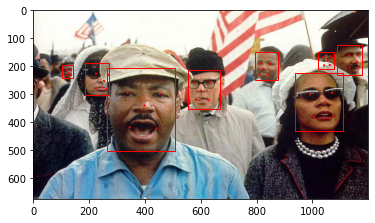

In [6]:
# using the MTCNN model
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw an image w/detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    #show the plot
    pyplot.show()
    
# load the image
# filename = 'data/test1.jpg'
# filename = 'data/test2.jpg'
filename = 'data/selma-to-montgomery-march.jpg'
pixels = pyplot.imread(filename)

# create the detector w/default weights
detector = MTCNN()

# detect faces in the image
faces = detector.detect_faces(pixels)
draw_image_with_boxes(filename, faces)

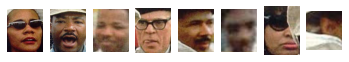

In [8]:
# using the MTCNN model, but showing the individual faces instead
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw each face separately
def draw_faces(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    #plot each face as a subplot
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        # define subplot
        pyplot.subplot(1, len(result_list), i+1)
        pyplot.axis('off')
        # plot face
        pyplot.imshow(data[y1:y2, x1:x2])
    # show the plot
    pyplot.show()
    
# load the image
# filename = 'data/test1.jpg'
# filename = 'data/test2.jpg'
filename = 'data/selma-to-montgomery-march.jpg'
pixels = pyplot.imread(filename)

# create the detector w/default weights
detector = MTCNN()

# detect faces in the image
faces = detector.detect_faces(pixels)
draw_faces(filename, faces)